In [576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ftplib import FTP
import gzip
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [577]:
# load data
df = pd.read_csv("./data_set_ALL_AML_train.csv")
df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [578]:
# reset index so the first column has a name 
#df = df.groupby('Gene Description').mean()
df.set_index('Gene Accession Number', inplace=True, drop=True)


In [579]:
df.head()

,Gene Description,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
AFFX-BioB-5_at,AFFX-BioB-5_at (endogenous control),-214,A,-139,A,-76,A,-135,A,-106,...,15,A,-318,A,-32,A,-124,A,-135,A
AFFX-BioB-M_at,AFFX-BioB-M_at (endogenous control),-153,A,-73,A,-49,A,-114,A,-125,...,-114,A,-192,A,-49,A,-79,A,-186,A
AFFX-BioB-3_at,AFFX-BioB-3_at (endogenous control),-58,A,-1,A,-307,A,265,A,-76,...,2,A,-95,A,49,A,-37,A,-70,A
AFFX-BioC-5_at,AFFX-BioC-5_at (endogenous control),88,A,283,A,309,A,12,A,168,...,193,A,312,A,230,P,330,A,337,A
AFFX-BioC-3_at,AFFX-BioC-3_at (endogenous control),-295,A,-264,A,-376,A,-419,A,-230,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [580]:
# dropping all rows with instances of "(endogenous control)" from the index column
df_new = df[~df['Gene Description'].str.contains(pat='(endogenous control)')]
df_new.head()

E:\Program Files\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Gene Description,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
hum_alu_at,hum_alu_at (miscellaneous control),15091,P,11038,P,16692,P,15763,P,18128,...,26052,P,11983,P,23508,P,17996,P,19679,P
A28102_at,GB DEF = GABAa receptor alpha-3 subunit,151,A,263,P,88,A,484,A,118,...,318,A,382,M,486,P,388,A,260,A
AB000114_at,Osteomodulin,72,A,21,A,-27,A,61,A,16,...,1,A,1,A,-23,A,56,A,-27,A
AB000115_at,mRNA,281,A,250,P,358,P,118,A,197,...,103,A,239,P,221,A,405,P,1306,P
AB000220_at,Semaphorin E,36,A,43,A,42,A,39,A,39,...,-61,A,72,A,39,A,192,P,32,A


In [581]:
# dropping all rows with instances of "(miscellaneous control)" from the index column
df_new = df_new[~df_new['Gene Description'].str.contains(pat='(miscellaneous control)')]
df_new.head()

,Gene Description,1,call,2,call.1,3,call.2,4,call.3,5,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,GB DEF = GABAa receptor alpha-3 subunit,151,A,263,P,88,A,484,A,118,...,318,A,382,M,486,P,388,A,260,A
AB000114_at,Osteomodulin,72,A,21,A,-27,A,61,A,16,...,1,A,1,A,-23,A,56,A,-27,A
AB000115_at,mRNA,281,A,250,P,358,P,118,A,197,...,103,A,239,P,221,A,405,P,1306,P
AB000220_at,Semaphorin E,36,A,43,A,42,A,39,A,39,...,-61,A,72,A,39,A,192,P,32,A
AB000409_at,MNK1,-299,A,-103,A,142,P,-11,A,237,...,39,A,377,P,-14,M,-31,A,-349,A


In [582]:
# drop gene description column since it is not useful right now
df_new = df_new.drop(columns=['Gene Description'])

In [583]:
df_new.head()

,1,call,2,call.1,3,call.2,4,call.3,5,call.4,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,151,A,263,P,88,A,484,A,118,P,...,318,A,382,M,486,P,388,A,260,A
AB000114_at,72,A,21,A,-27,A,61,A,16,A,...,1,A,1,A,-23,A,56,A,-27,A
AB000115_at,281,A,250,P,358,P,118,A,197,M,...,103,A,239,P,221,A,405,P,1306,P
AB000220_at,36,A,43,A,42,A,39,A,39,A,...,-61,A,72,A,39,A,192,P,32,A
AB000409_at,-299,A,-103,A,142,P,-11,A,237,P,...,39,A,377,P,-14,M,-31,A,-349,A


In [584]:
# find all instances of NA values
print('NA values in DF:', df_new.isna().sum().sum())

# No NA values

NA values in DF: 0


In [585]:
# drop the columns with 'call' as these are not needed right now. just need the numbered columns
df_norm = df_new.loc[:]
df_norm= df_norm[df_norm.columns.drop(list(df_norm.filter(regex='call')))]

# normalize data using equation Mark sent us 
df_norm = df_norm.apply(lambda x: (x - np.mean(x)) / np.std(x), axis=1)
df_norm.head()


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,-0.682736,-0.067116,-1.029022,1.147633,-0.864124,-0.028640,1.004722,3.280316,-1.171934,-0.446382,...,1.087171,-1.237893,-0.144069,0.449564,-0.468369,0.235197,0.586980,1.158627,0.619959,-0.083606
AB000114_at,0.787202,-0.177755,-1.085950,0.579074,-0.272359,1.033171,-0.764298,-0.102072,-1.294078,0.654757,...,-0.575090,-1.237316,0.106056,-0.896743,0.162818,-0.556170,-0.556170,-1.010267,0.484470,-1.085950
AB000115_at,-0.077934,-0.151262,0.104203,-0.463497,-0.276629,-0.574671,-0.345226,-0.042453,-0.274264,-0.475324,...,0.063991,-0.567575,0.033240,-0.567575,-0.236417,-0.498978,-0.177282,-0.219859,0.215377,2.346616
AB000220_at,-0.017084,0.151228,0.127183,0.055049,0.055049,-0.113263,-0.642243,0.535941,-0.233486,0.055049,...,-1.051001,0.055049,-0.594154,0.343584,0.824476,-2.349409,0.848521,0.055049,3.733870,-0.113263
AB000409_at,-1.688585,-0.627628,0.698568,-0.129628,1.212807,-0.676346,0.400850,-2.884868,0.731046,-0.205411,...,-0.952411,2.290003,-0.844150,0.406263,-0.351563,0.141024,1.970633,-0.145867,-0.237889,-1.959237


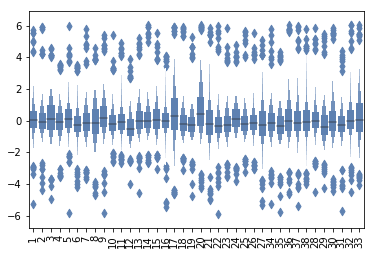

In [586]:
# create a boxplot of normalized data
sns.boxenplot(data=df_norm, color='#507fbf')
_ = plt.xticks(rotation=90)

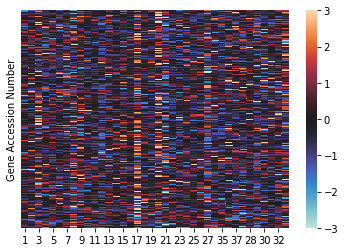

In [587]:
# create heatmap
sns.heatmap(data=df_norm, vmax=3, vmin=-3, center=0, yticklabels=False)

In [588]:
# extract ALL samples
ALL_samples = []
for i in range (1,27):
    ALL_samples.append('{}'.format(i))

ALL_samples

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26']

In [589]:
# extract AML samples
AML_samples = []
for i in range (27,38):
    AML_samples.append('{}'.format(i))
AML_samples

['27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37']

In [590]:
df_norm[['ALL_mean', 'ALL_std']] = df_norm[ALL_samples].agg(['mean', 'std'], axis=1)
df_norm[['AML_mean', 'AML_std']] = df_norm[AML_samples].agg(['mean', 'std'], axis=1)
df_norm.head()


,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,ALL_mean,ALL_std,AML_mean,AML_std
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,-0.682736,-0.067116,-1.029022,1.147633,-0.864124,-0.028640,1.004722,3.280316,-1.171934,-0.446382,...,-0.468369,0.235197,0.586980,1.158627,0.619959,-0.083606,-0.139418,1.110006,0.288664,0.746532
AB000114_at,0.787202,-0.177755,-1.085950,0.579074,-0.272359,1.033171,-0.764298,-0.102072,-1.294078,0.654757,...,0.162818,-0.556170,-0.556170,-1.010267,0.484470,-1.085950,0.153357,1.104053,-0.280959,0.724066
AB000115_at,-0.077934,-0.151262,0.104203,-0.463497,-0.276629,-0.574671,-0.345226,-0.042453,-0.274264,-0.475324,...,-0.236417,-0.498978,-0.177282,-0.219859,0.215377,2.346616,0.007221,1.117886,0.034531,0.801354
AB000220_at,-0.017084,0.151228,0.127183,0.055049,0.055049,-0.113263,-0.642243,0.535941,-0.233486,0.055049,...,0.824476,-2.349409,0.848521,0.055049,3.733870,-0.113263,-0.159502,0.465841,0.345770,1.745857
AB000409_at,-1.688585,-0.627628,0.698568,-0.129628,1.212807,-0.676346,0.400850,-2.884868,0.731046,-0.205411,...,-0.351563,0.141024,1.970633,-0.145867,-0.237889,-1.959237,-0.032402,0.938924,0.039652,1.255026


In [596]:
# define welch's t-test
def welch_t_test(row):
    return (
        (row['ALL_mean'] - row['AML_mean']) / 
        np.sqrt(
            row['ALL_std']/len(ALL_samples) + row['AML_std']/len(AML_samples)
        )
    )
# only apply t-test to applicable columns
df_norm['similarity'] = df_norm[['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std']].apply(welch_t_test, axis=1)
df_norm.head()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,ALL_mean,ALL_std,AML_mean,AML_std,similarity
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
A28102_at,-0.682736,-0.067116,-1.029022,1.147633,-0.864124,-0.028640,1.004722,3.280316,-1.171934,-0.446382,...,0.235197,0.586980,1.158627,0.619959,-0.083606,-0.139418,1.110006,0.288664,0.746532,-1.287448
AB000114_at,0.787202,-0.177755,-1.085950,0.579074,-0.272359,1.033171,-0.764298,-0.102072,-1.294078,0.654757,...,-0.556170,-0.556170,-1.010267,0.484470,-1.085950,0.153357,1.104053,-0.280959,0.724066,1.319826
AB000115_at,-0.077934,-0.151262,0.104203,-0.463497,-0.276629,-0.574671,-0.345226,-0.042453,-0.274264,-0.475324,...,-0.498978,-0.177282,-0.219859,0.215377,2.346616,0.007221,1.117886,0.034531,0.801354,-0.080238
AB000220_at,-0.017084,0.151228,0.127183,0.055049,0.055049,-0.113263,-0.642243,0.535941,-0.233486,0.055049,...,-2.349409,0.848521,0.055049,3.733870,-0.113263,-0.159502,0.465841,0.345770,1.745857,-1.202242
AB000409_at,-1.688585,-0.627628,0.698568,-0.129628,1.212807,-0.676346,0.400850,-2.884868,0.731046,-0.205411,...,0.141024,1.970633,-0.145867,-0.237889,-1.959237,-0.032402,0.938924,0.039652,1.255026,-0.185915


In [597]:
# discard the last 5 columns created to plot heatmap
df_sorted = df_norm.sort_values('similarity').drop(columns=['ALL_mean', 'ALL_std', 'AML_mean', 'AML_std', 'similarity'])
#df_sorted = df_sorted.groupby(df_sorted.index).mean()


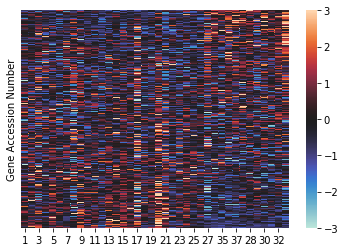

In [598]:
# plot heatmap of all genes. Can start to see pattern (more red in upper right and lower left samples)
sns.heatmap(data=df_sorted, vmax=3, vmin=-3, center=0, yticklabels=False)

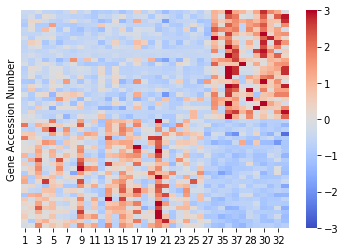

In [599]:
# plot top 25 genes of each sample in heatmap
df_features = df_sorted.head(25).append(df_sorted.tail(25))
sns.heatmap(data=df_features, vmax=3, vmin=-3, center=0, yticklabels=False, cmap='coolwarm')

# Question 2: Prediction Model

### Importing necessary libraries

In [609]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Loading label data

In [610]:
labels = pd.read_csv('cleaned_ALL_AML_labels.tsv', sep='\t')
#add 0s to single digits for sorting
cleaned_samples = []
for samplenum in labels['Sample']:
    cleaned_samples.append(('0' + str(samplenum))[-2:])
    
labels['Sample'] = cleaned_samples

train_labels = labels.iloc[:38, :]
train_labels

,Sample,Label
0,01,ALL
1,02,ALL
2,03,ALL
3,04,ALL
4,05,ALL
5,06,ALL
6,07,ALL
7,08,ALL
8,09,ALL
9,10,ALL


## Training a logistical regressor

In [611]:
#Sorting columns to be in numerical order

new_cols = []
for column in df_features.columns:
    if(len(column) == 1):
        new_cols.append('0' + column)
    else:
        new_cols.append(column)
df_features.columns = new_cols
df_features = df_features.reindex(sorted(df_features.columns), axis=1)
df_features.head()

,01,02,03,04,05,06,07,08,09,10,...,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,-0.360132,-0.431601,-0.044289,-0.569927,-0.586065,-0.685198,-0.426990,0.266945,-0.542261,-0.301344,...,1.277875,2.745282,1.736656,1.266348,-0.073106,1.113037,0.807568,2.914731,1.270959,0.979322
M16038_at,-0.508185,-0.199314,-0.814672,0.097633,-0.125375,-0.583316,-0.555888,-0.652484,-0.617900,-0.771740,...,0.612816,2.269275,0.282479,2.252579,2.900137,1.052869,-0.066940,2.308629,1.917471,-0.008505
M55150_at,-0.790243,0.306325,0.311555,-0.335228,-0.654261,-0.725739,-0.443316,0.227874,-0.497360,-0.387529,...,0.940905,1.751563,0.780517,0.709039,2.764450,1.226815,0.520757,1.045506,1.681829,1.125700
X17042_at,-0.921548,0.071034,-0.849288,-0.856545,1.435191,-0.794565,-0.853219,-0.932734,-0.718678,-0.644302,...,1.703367,2.351583,0.793324,0.010264,1.702157,1.600269,0.121827,2.230647,1.588477,-0.586555
D49950_at,-0.487368,0.048006,-0.794712,0.930382,-0.140366,-0.903770,-0.090794,-0.913684,-1.141714,-0.695569,...,0.652781,2.001131,0.722181,1.336870,-0.239509,2.288646,1.693786,1.574814,1.852415,-0.536940


In [615]:
#converting dfs to proper format for modeling
###for generating the train_x and train_y the following are needed:
#train_x: a matrix where the samples (1-38) are the rows and the genes (top 25 of ALL and AML) are the columns 
#to do this I took the transpose of the df_features and extracted the raw values
test_data = pd.read_csv('data_set_ALL_AML_independent.tsv', sep='\t', index_col = 1)
test = test_data.loc[list(df_features.index)]
test= test[test.columns.drop(list(test.filter(regex='call')))].iloc[:, 1:]
test = test.reindex(sorted(test.columns), axis=1)

X = pd.concat([df_features, test], axis=1, sort=False).T.values
y = labels['Label'].apply(lambda x: 0 if x == 'ALL' else 1).values
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=.7)
#for train_y the labels need to be represented with integers - since this is a binary classification, I did a simple binary substitution

#sanity check for proper shapes
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)


(50, 50) (22, 50) (50,) (22,)


E:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [613]:
#creating the regressor
clf = LogisticRegression(random_state=0, solver='liblinear',multi_class='auto').fit(train_X, train_y)
clf.fit(train_X, train_y)       
guesses = clf.predict(train_X)

correct = 0
for i in range(len(guesses)):
    if(guesses[i] == train_y[i]):
        correct +=1 
print(correct/len(guesses))

1.0


E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Evaluating the model

In [614]:
correct = 0
test_guess = clf.predict(test_X)
for i in range(len(test_guess)):
    if(test_guess[i] == test_y[i]):
        correct +=1 
print("Correct predictions: {}%".format(round(correct/len(test_y) * 100)))
print(test_guess)


Correct predictions: 100%
[0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0]


In [616]:
correct = 0
test_guess = clf.predict(test_X)
for i in range(len(test_guess)):
    if(test_guess[i] == test_y[i]):
        correct +=1 
print("Correct predictions: {}%".format(round(correct/len(test_y) * 100)))
print(test_guess)


Correct predictions: 100%
[1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0]


## Cross Validation

In [617]:
#This is how cross validation works: CLF is the classifier, test_X and test_Y are the data and labels for the test st, and cv is the number of folds
#Here LOO is used to get the folds
##I'm not sure if we need to do it on just the test set or on training and test sets but here's code for both just in case


#### LOO Cross Validation with only the test set

In [618]:
loo = LeaveOneOut()
score = cross_val_score(clf, test_X, test_y, cv=loo)


#### LOO Cross Validation with all data

In [619]:
loo = LeaveOneOut()
score = cross_val_score(clf, X, y, cv=loo)


E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

In [620]:
print("Cross Validation Scores: {}".format(score))
print('Mean Cross Validation Score: {}%'.format(round(score.mean() * 100)))

Cross Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
Mean Cross Validation Score: 97.0%


In [621]:
predict = clf.predict(test_X)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(test_y, predict )
roc_auc = auc(fpr, tpr)
print("Area Under the Curve: {}%".format(round(roc_auc * 100)))

Area Under the Curve: 100.0%


## Plot

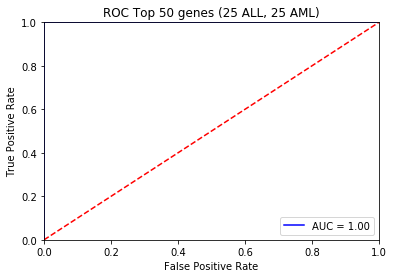

In [622]:
# plot ROC curve
plt.title('ROC Top 50 genes (25 ALL, 25 AML)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PART 3 - train model using different number of genes

In [ ]:
# Trained model using different number of genes.
# After using the top 50 genes, (25 ALL and 25 AML), we used the top 10 genes (5 ALL, 5 AML):
# top_10_genes = df_sorted.head(5).append(df_sorted.tail(5)).
# We plugged top_10_genes into the original model created in place of df_features which is storing
# the top 50 genes.
# After running training it and testing it, we found it had an AUC = 91.0% 
# We did the same for the top 1000 genes:
# top_1000_genes = df_sorted.head(500).append(df_sorted.tail(500)).
# After training the model with the 1000 genes and testing it, it had an AUC = 68.0%.
# The original number of genes we trained with (50) provided the highest accuracy of 94.0%

In [71]:
# extract top 10 genes from sorted data from part 1
top_10_genes = df_sorted.head(5).append(df_sorted.tail(5))

#Sorting columns to be in numerical order
new_cols_2 = []
for column in top_10_genes.columns:
    if(len(column) == 1):
        new_cols_2.append('0' + column)
    else:
        new_cols_2.append(column)
top_10_genes.columns = new_cols_2
top_10_genes = top_10_genes.reindex(sorted(top_10_genes.columns), axis=1)
top_10_genes.head()

,01,02,03,04,05,06,07,08,09,10,...,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,-0.360132,-0.431601,-0.044289,-0.569927,-0.586065,-0.685198,-0.426990,0.266945,-0.542261,-0.301344,...,1.277875,2.745282,1.736656,1.266348,-0.073106,1.113037,0.807568,2.914731,1.270959,0.979322
M16038_at,-0.508185,-0.199314,-0.814672,0.097633,-0.125375,-0.583316,-0.555888,-0.652484,-0.617900,-0.771740,...,0.612816,2.269275,0.282479,2.252579,2.900137,1.052869,-0.066940,2.308629,1.917471,-0.008505
M55150_at,-0.790243,0.306325,0.311555,-0.335228,-0.654261,-0.725739,-0.443316,0.227874,-0.497360,-0.387529,...,0.940905,1.751563,0.780517,0.709039,2.764450,1.226815,0.520757,1.045506,1.681829,1.125700
X17042_at,-0.921548,0.071034,-0.849288,-0.856545,1.435191,-0.794565,-0.853219,-0.932734,-0.718678,-0.644302,...,1.703367,2.351583,0.793324,0.010264,1.702157,1.600269,0.121827,2.230647,1.588477,-0.586555
D49950_at,-0.487368,0.048006,-0.794712,0.930382,-0.140366,-0.903770,-0.090794,-0.913684,-1.141714,-0.695569,...,0.652781,2.001131,0.722181,1.336870,-0.239509,2.288646,1.693786,1.574814,1.852415,-0.536940


In [74]:

train_X_2 = top_10_genes.T.values
#for train_y_2 the labels need to be represented with integers - since this is a binary classification, I did a simple binary substitution
train_y_2 = train_labels['Label'].apply(lambda x: 0 if x == 'ALL' else 1).values
train_y_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
##creating the neural net for top 10 genes
clf_2 = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(5000, 200), random_state=1)
clf.fit(train_X_2, train_y_2)       
guesses_2 = clf.predict(train_X_2)

correct = 0
for i in range(len(guesses_2)):
    if(guesses_2[i] == train_y_2[i]):
        correct +=1 
print(correct/len(guesses_2))

1.0


In [76]:
# Evaluating model
#preparing test data

test_data = pd.read_csv('data_set_ALL_AML_independent.tsv', sep='\t', index_col = 1)
test_2 = test_data.loc[list(top_10_genes.index)]
test_2 = test_2[test_2.columns.drop(list(test_2.filter(regex='call')))].iloc[:, 1:]
#test = test.groupby(test.index).mean() #collapsing duplicate gene rows into means
test_2 = test_2.reindex(sorted(test_2.columns), axis=1)

test_2.head()

,39,40,41,42,43,44,45,46,47,48,...,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,1122,1016,428,64,646,188,470,591,1141,769,...,2502,3190,2349,775,993,1049,1496,682,931,1029
M16038_at,164,797,491,265,223,252,87,173,313,178,...,2686,1499,716,460,1448,462,505,426,190,406
M55150_at,627,503,181,1565,1165,441,309,385,767,927,...,1476,3220,610,749,654,859,623,360,310,665
X17042_at,33,1269,1183,1045,7064,155,1327,283,2450,1537,...,5178,6311,5086,3340,4401,2282,2128,348,1128,1357
D49950_at,214,234,-4,35,43,97,142,80,191,51,...,250,455,218,65,53,145,84,12,105,146


In [77]:
#preparing test X and y and running the model

test_X_2 = test_2.T.values
test_y_2 = labels['Label'].iloc[38:].apply(lambda x: 0 if x == 'ALL' else 1).values
print(test_X_2)
print(test_y_2.shape)

[[ 1122   164   627    33   214    43   176   475  2037  4646]
 [ 1016   797   503  1269   234   373   490   251  1497  2141]
 [  428   491   181  1183    -4   167  1258   616  4240  3686]
 [   64   265  1565  1045    35   127   678   362  2105  3090]
 [  646   223  1165  7064    43   274   699   329  3821  3619]
 [  188   252   441   155    97   216  1236   710  3686  5420]
 [  470    87   309  1327   142   236   555   467  2943  3770]
 [  591   173   385   283    80   177   384   475  2809  3972]
 [ 1141   313   767  2450   191   239  1903   493  2805  3198]
 [  769   178   927  1537    51   776  2123   951  6996 10565]
 [ 1390   390   894   690   128   -41   424   356  2753  5279]
 [ 2442  2735  1895  7281   346    48   148    70  1238  1683]
 [ 2335  2089  1339  6957   211     2   148    64   376   764]
 [  541  1744   801  6371   109   -22   401   248   407  1439]
 [ 3568  1522  1534  7056   106    45   162   158  2585   666]
 [ 1083   855  1811  7248   204    26   784   575  2685

In [78]:
correct_2 = 0
test_guess_2 = clf.predict(test_X_2)
for i in range(len(test_guess_2)):
    if(test_guess_2[i] == test_y_2[i]):
        correct_2 +=1 
print("Correct predictions: {}%".format(round(correct_2/len(test_y_2) * 100)))
print(test_guess_2)

Correct predictions: 91%
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0]


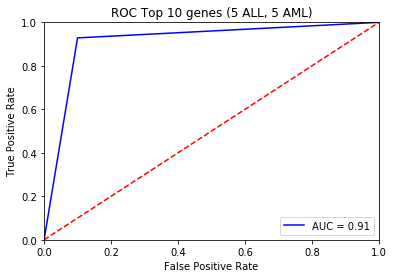

Area Under the Curve: 91.0%


In [81]:
# find ROC and AUC:
predict_2 = clf.predict(test_X_2)
fpr_2 = dict()
tpr_2 = dict()
roc_auc_2 = dict()
fpr_2, tpr_2, _ = roc_curve(test_y_2, predict_2)
roc_auc_2 = auc(fpr_2, tpr_2)
# plot ROC curve
plt.title('ROC Top 10 genes (5 ALL, 5 AML)')
plt.plot(fpr_2, tpr_2, 'b', label = 'AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Area Under the Curve: {}%".format(round(roc_auc_2 * 100)))

In [91]:
# extract top 1000 genes from sorted data from part 1
top_1000_genes = df_sorted.head(500).append(df_sorted.tail(500))

#Sorting columns to be in numerical order
new_cols_3 = []
for column in top_1000_genes.columns:
    if(len(column) == 1):
        new_cols_3.append('0' + column)
    else:
        new_cols_3.append(column)
top_1000_genes.columns = new_cols_3
top_1000_genes = top_1000_genes.reindex(sorted(top_1000_genes.columns), axis=1)
top_1000_genes.head()

,01,02,03,04,05,06,07,08,09,10,...,29,30,31,32,33,34,35,36,37,38
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,-0.360132,-0.431601,-0.044289,-0.569927,-0.586065,-0.685198,-0.426990,0.266945,-0.542261,-0.301344,...,1.277875,2.745282,1.736656,1.266348,-0.073106,1.113037,0.807568,2.914731,1.270959,0.979322
M16038_at,-0.508185,-0.199314,-0.814672,0.097633,-0.125375,-0.583316,-0.555888,-0.652484,-0.617900,-0.771740,...,0.612816,2.269275,0.282479,2.252579,2.900137,1.052869,-0.066940,2.308629,1.917471,-0.008505
M55150_at,-0.790243,0.306325,0.311555,-0.335228,-0.654261,-0.725739,-0.443316,0.227874,-0.497360,-0.387529,...,0.940905,1.751563,0.780517,0.709039,2.764450,1.226815,0.520757,1.045506,1.681829,1.125700
X17042_at,-0.921548,0.071034,-0.849288,-0.856545,1.435191,-0.794565,-0.853219,-0.932734,-0.718678,-0.644302,...,1.703367,2.351583,0.793324,0.010264,1.702157,1.600269,0.121827,2.230647,1.588477,-0.586555
D49950_at,-0.487368,0.048006,-0.794712,0.930382,-0.140366,-0.903770,-0.090794,-0.913684,-1.141714,-0.695569,...,0.652781,2.001131,0.722181,1.336870,-0.239509,2.288646,1.693786,1.574814,1.852415,-0.536940


In [92]:
train_X_3 = top_1000_genes.T.values
#for train_y_2 the labels need to be represented with integers - since this is a binary classification, I did a simple binary substitution
train_y_3 = train_labels['Label'].apply(lambda x: 0 if x == 'ALL' else 1).values
train_y_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [93]:
##creating the neural net for top 10 genes
clf_3 = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(5000, 200), random_state=1)
clf.fit(train_X_3, train_y_3)       
guesses_3 = clf.predict(train_X_3)

correct = 0
for i in range(len(guesses_3)):
    if(guesses_3[i] == train_y_3[i]):
        correct +=1 
print(correct/len(guesses_3))

1.0


In [94]:
# Evaluating model
#preparing test data

test_data = pd.read_csv('data_set_ALL_AML_independent.tsv', sep='\t', index_col = 1)
test_3 = test_data.loc[list(top_1000_genes.index)]
test_3 = test_3[test_3.columns.drop(list(test_3.filter(regex='call')))].iloc[:, 1:]
#test_3 = test_3.groupby(test_3.index).mean() #collapsing duplicate gene rows into means
test_3 = test_3.reindex(sorted(test_2.columns), axis=1)

test_3.head()

,39,40,41,42,43,44,45,46,47,48,...,63,64,65,66,67,68,69,70,71,72
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,1122,1016,428,64,646,188,470,591,1141,769,...,2502,3190,2349,775,993,1049,1496,682,931,1029
M16038_at,164,797,491,265,223,252,87,173,313,178,...,2686,1499,716,460,1448,462,505,426,190,406
M55150_at,627,503,181,1565,1165,441,309,385,767,927,...,1476,3220,610,749,654,859,623,360,310,665
X17042_at,33,1269,1183,1045,7064,155,1327,283,2450,1537,...,5178,6311,5086,3340,4401,2282,2128,348,1128,1357
D49950_at,214,234,-4,35,43,97,142,80,191,51,...,250,455,218,65,53,145,84,12,105,146


In [95]:
#preparing test X and y and running the model
test_X_3 = test_3.T.values
test_y_3 = labels['Label'].iloc[38:].apply(lambda x: 0 if x == 'ALL' else 1).values

In [96]:
correct_3 = 0
test_guess_3 = clf.predict(test_X_3)
for i in range(len(test_guess_3)):
    if(test_guess_3[i] == test_y_3[i]):
        correct_3 +=1 
print("Correct predictions: {}%".format(round(correct_3/len(test_y_3) * 100)))
print(test_guess_3)

Correct predictions: 74%
[0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


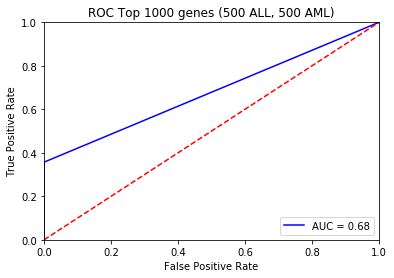

Area Under the Curve: 68.0%


In [98]:
# find ROC and AUC:
predict_3 = clf.predict(test_X_3)
fpr_3 = dict()
tpr_3 = dict()
roc_auc_3 = dict()
fpr_3, tpr_3, _ = roc_curve(test_y_3, predict_3)
roc_auc_3 = auc(fpr_3, tpr_3)
# plot ROC curve
plt.title('ROC Top 1000 genes (500 ALL, 500 AML)')
plt.plot(fpr_3, tpr_3, 'b', label = 'AUC = %0.2f' % roc_auc_3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Area Under the Curve: {}%".format(round(roc_auc_3 * 100)))

# Question 4: Clustering

In [56]:
import numpy as np
import os
import pandas as pd

In [57]:
df_sorted.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,28,29,30,31,32,33
Gene Accession Number,,,,,,,,,,,,,,,,,,,,,
U50136_rna1_at,-0.360132,-0.431601,-0.044289,-0.569927,-0.586065,-0.685198,-0.426990,0.266945,-0.542261,-0.301344,...,0.807568,2.914731,1.270959,0.979322,0.235821,1.277875,2.745282,1.736656,1.266348,-0.073106
M16038_at,-0.508185,-0.199314,-0.814672,0.097633,-0.125375,-0.583316,-0.555888,-0.652484,-0.617900,-0.771740,...,-0.066940,2.308629,1.917471,-0.008505,-0.133723,0.612816,2.269275,0.282479,2.252579,2.900137
M55150_at,-0.790243,0.306325,0.311555,-0.335228,-0.654261,-0.725739,-0.443316,0.227874,-0.497360,-0.387529,...,0.520757,1.045506,1.681829,1.125700,1.432530,0.940905,1.751563,0.780517,0.709039,2.764450
X17042_at,-0.921548,0.071034,-0.849288,-0.856545,1.435191,-0.794565,-0.853219,-0.932734,-0.718678,-0.644302,...,0.121827,2.230647,1.588477,-0.586555,1.400724,1.703367,2.351583,0.793324,0.010264,1.702157
D49950_at,-0.487368,0.048006,-0.794712,0.930382,-0.140366,-0.903770,-0.090794,-0.913684,-1.141714,-0.695569,...,1.693786,1.574814,1.852415,-0.536940,1.713615,0.652781,2.001131,0.722181,1.336870,-0.239509


In [122]:
df_clustering = df_features.apply(np.log)
df_clustering.head()

samples = {
    '1': 'ALL',
 '2': 'ALL',
 '3': 'ALL',
 '4': 'ALL',
 '5': 'ALL',
 '6': 'ALL',
 '7': 'ALL',
 '8': 'ALL',
 '9': 'ALL',
 '10': 'ALL',
 '11': 'ALL',
 '12': 'ALL',
 '13': 'ALL',
 '14': 'ALL',
 '15': 'ALL',
 '16': 'ALL',
 '17': 'ALL',
 '18': 'ALL',
 '19': 'ALL',
 '20': 'ALL',
 '21': 'ALL',
 '22': 'ALL',
 '23': 'ALL',
 '24': 'ALL',
 '25': 'ALL',
 '26': 'ALL',
    '27': 'AML',
    '28': 'AML',
    '29': 'AML',
    '30': 'AML',
    '31': 'AML',
    '32': 'AML',
    '33': 'AML',
    '34': 'AML',
    '35': 'AML',
    '36': 'AML',
    '37': 'AML',
    '38': 'AML',
}

In [126]:
df_clustering = df_sorted.transpose()
df_clustering['type1'] = pd.Series(samples).astype('category')
df_clustering['type_codes'] = df_clustering['type1'].cat.codes
df_clustering


Gene Accession Number,U50136_rna1_at,M16038_at,M55150_at,X17042_at,D49950_at,X95735_at,M23197_at,U67963_at,M63138_at,M84526_at,...,D63874_at,M92287_at,U20998_at,S50223_at,X74262_at,M31211_s_at,U22376_cds2_s_at,X59417_at,type1,type_codes
1,-0.360132,-0.508185,-0.790243,-0.921548,-0.487368,-0.560038,-0.245261,-0.538314,-0.605018,-0.521847,...,-0.978053,0.675223,0.290436,0.004175,0.301921,0.537138,0.071339,-0.170983,ALL,0
2,-0.431601,-0.199314,0.306325,0.071034,0.048006,-0.553935,-0.704370,0.511874,-0.229722,-0.424212,...,1.103572,-0.199450,0.135813,0.329834,0.106989,-0.009974,-0.833202,-0.001801,ALL,0
3,-0.044289,-0.814672,0.311555,-0.849288,-0.794712,-0.552579,-0.107528,0.218318,-0.039408,-0.572008,...,1.263351,0.737520,1.322616,2.242033,1.182224,0.359161,0.725960,1.781250,ALL,0
4,-0.569927,0.097633,-0.335228,-0.856545,0.930382,-0.292181,-0.167786,-0.966245,-0.719043,-0.559467,...,0.239135,0.938299,0.017031,0.772395,-0.030915,0.111972,1.146592,0.162821,ALL,0
5,-0.586065,-0.125375,-0.654261,1.435191,-0.140366,-0.278618,0.139243,-0.468026,-0.662851,-0.265219,...,0.546034,0.112031,0.848509,0.872598,0.299847,0.734889,0.237043,0.741275,ALL,0
6,-0.685198,-0.583316,-0.725739,-0.794565,-0.903770,-0.594622,-0.827756,-1.113023,-0.422907,-0.413015,...,-0.652307,0.002171,-0.467316,-0.045926,0.233487,-0.332968,0.164206,0.317490,ALL,0
7,-0.426990,-0.555888,-0.443316,-0.853219,-0.090794,-0.726856,-0.753150,-0.633410,-0.061556,-0.559020,...,-0.383665,0.338487,-0.585075,-0.246331,0.267704,-0.425252,0.449635,0.870650,ALL,0
8,0.266945,-0.652484,0.227874,-0.932734,-0.913684,-0.907914,-0.273955,-0.672688,-0.378610,-0.688901,...,-0.863001,0.050156,0.119429,0.179530,-0.441516,-0.576861,0.817916,-0.562010,ALL,0
9,-0.542261,-0.617900,-0.497360,-0.718678,-1.141714,-0.913339,-0.549421,-0.542448,0.006120,-0.498558,...,0.682747,1.746888,0.885373,1.557315,2.604811,1.779675,0.515644,1.805300,ALL,0
10,-0.301344,-0.771740,-0.387529,-0.644302,-0.695569,-0.428483,-0.514987,-0.426680,-0.422497,-0.411224,...,-0.123743,-0.209552,-0.605555,-0.480137,-0.023657,1.034812,-0.587378,0.736299,ALL,0


In [127]:
features = df_clustering.drop(columns=['type1', 'type_codes']).values
labels = df_clustering['type_codes'].values
print('features:', features.shape)
print('labels:', labels.shape)

features: (38, 7070)
labels: (38,)


In [128]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(features)
kmeans.labels_

array([0, 2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [129]:
labels = kmeans.predict(features)
centroids = kmeans.cluster_centers_

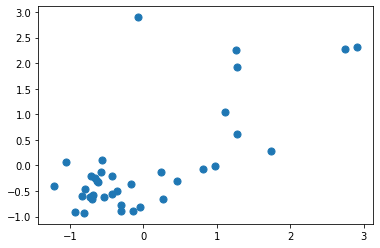

In [130]:
plt.scatter(features[:, 0], features[:, 1], s=50);

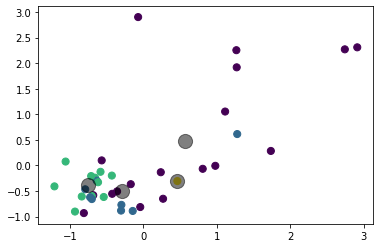

In [131]:
plt.scatter(features[:, 0], features[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)